# FIFA 21 Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

## Import dataset

In [2]:
df_ = pd.read_csv('fifa21 raw data v2.csv')
# Make a copy of the original dataset so you can retain the original data while working on the copy
df = df_.copy()
df

C:\Users\user\AppData\Local\Temp\ipykernel_10564\2580592055.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ = pd.read_csv('fifa21 raw data v2.csv')


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


## A brief overview of the  dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

## Errors observed
1. Wrong datatypes
2. non uniform measuring units
3. presence of strange characters
4. use of M and K in place million and thousand figures

## Data Cleaning & Preparation

In [4]:
# replace all the "\n"s in the club column with empty space or nothing
df['Club'] = df.Club.str.replace("[\n]*",'')
# Changing the imperial measurments in the Height column to metric measurments
def convert_height(x):
    ft = 30.48
    In = 2.24
    if x[-1] == '"':
        fts = int(x[0])*ft
#         print(x[2:-1],":",x)
        Ins = int(x[2:-1])*In
        return round(fts + Ins)
    elif x[-1] == "m":
        return int(x[:-2])
df.Height = df.Height.apply(convert_height)
# Changing the imperial measurments in the Weight column to metric measurments
def convert_weight(x):
    if x[-1] == 's':
        x = x.replace("lsb", "")
        kg = int(x[:3])/2.205
        return round(kg)
    elif x[-1] == "g":
        return int(x[:-2])    
df.Weight = df.Weight.apply(convert_weight)
# Creating a new column to hold the contract status of the players
def contractd(x):
    if x[-4:].isdigit():
        return "yes"
    elif x[-4:] == "Loan":
        return "loan"
    elif x == "Free":
        return "no"    
df['Contracted'] = df.Contract.apply(contractd)
df.Contracted = df.Contracted.astype("category")
# Replace the K in Hits colum as well as convert appropriately into numerical datatype
def correct_hits(x):
    if str(x)[-1] == "K":
        return int(float(x[:-1])*1e3)
    elif str(x)[-1].isdigit():
        return int(float(x)*1e3)
    elif x == np.nan:
        return np.nan
df['Hits'] = df.Hits.apply(correct_hits)
# Replace the K in Wage colum as well as convert appropriately into numerical datatype
def correct_wage(x):
    if x[-1] == "K":
        return int(x[1:-1])*1e3
    else:
        return int(x[1:])
df['Wage'] = df.Wage.apply(correct_wage)
# Replace the K and M in Value and Release clause colums as well as convert appropriately into numerical datatype
def correct_value(x):
    if x[-1] == "M":
        return int(float(x[1:-1])*1e6)
    elif x[-1] == "K":
        return int(float(x[1:-1])*1e3)
    else:
        return int(x[1:])
df['Value'] = df.Value.apply(correct_value)
df['Release Clause'] = df["Release Clause"].apply(correct_value)    
# Remove the strange characters in the W/F, SM and IR columns
def correct_ratings(x):
    return x[0]
df['W/F'] = df["W/F"].apply(correct_ratings)
df['SM'] = df["SM"].apply(correct_ratings)
df['IR'] = df["IR"].apply(correct_ratings)
# Convert the Joined column datatype to a datetime
df["Joined"] = pd.to_datetime(df["Joined"])
# Convert the datatype non nan values of the Lone Date End Column to datetime
def clean_loan_date_end(x):
    if x == np.nan:
        return np.nan
    else:
        return pd.to_datetime(x)
df["Loan Date End"] = df["Loan Date End"].apply(clean_loan_date_end)
# Rename column
df.rename(columns={'↓OVA':'OVA'}, inplace=True)
# Create thre categories for players by age
def categorize_age(x):
    if x <= 22:
        return 'young'
    elif x <= 32:
        return 'prime'
    else:
        return 'old'
df['age_group'] = df['Age'].apply(categorize_age)

C:\Users\user\AppData\Local\Temp\ipykernel_10564\2577891620.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Club'] = df.Club.str.replace("[\n]*",'')


## Final Cleaned Data

In [5]:
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contracted,age_group
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,5,85,92,91,95,38,65,771000.0,yes,old
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,5,89,93,81,89,35,77,562000.0,yes,old
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,3,87,92,78,90,52,90,150000.0,yes,prime
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,4,76,86,93,88,64,78,207000.0,yes,prime
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,5,91,85,86,94,36,59,595000.0,yes,prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,...,1,64,28,26,38,48,51,NaN,yes,young
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,...,1,64,40,48,49,35,45,NaN,yes,young
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,Derry City,...,1,63,39,44,46,40,53,NaN,yes,young
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,Dalian YiFang FC,...,1,58,49,41,49,30,44,NaN,yes,young


## Data Visualization

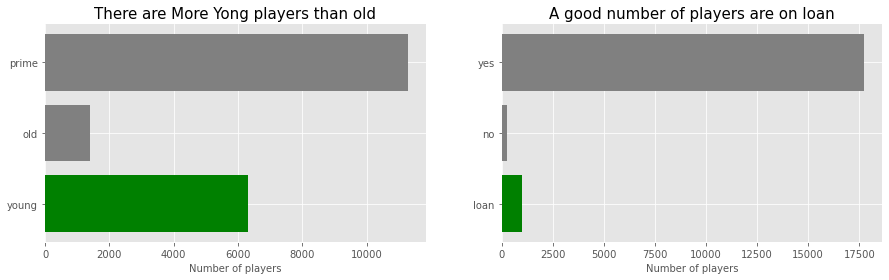

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 4))
players_age_dist = df.groupby('age_group').agg(No_of_players = ("ID", 'count'))
players_age_dist_top = players_age_dist.tail(1)
players_age_dist_last = players_age_dist.head(2)

ax1.barh(players_age_dist_top.index, players_age_dist_top.No_of_players, color="green")
ax1.barh(players_age_dist_last.index, players_age_dist_last.No_of_players, color="gray")

ax1.set_xlabel("Number of players", fontsize=10)
ax1.set_title("There are More Yong players than old", fontsize=15)
ax1.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

#------------------------------------------------------------

contracted = df.groupby('Contracted').agg(No_of_players = ("ID", 'count'))
contracted_top = contracted.head(1)
contracted_dist_last = contracted.tail(2)

ax2.barh(contracted_top.index, contracted_top.No_of_players, color="green")
ax2.barh(contracted_dist_last.index, contracted_dist_last.No_of_players, color="gray")

ax2.set_xlabel("Number of players", fontsize=10)
ax2.set_title("A good number of players are on loan", fontsize=15)
ax2.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

## Some useful statistics

### Top 10 oldest players

In [7]:
df.sort_values('Age', ascending=False)[["LongName", 'Age', 'Nationality', 'Club']].head(10)

,LongName,Age,Nationality,Club
16109,Kazuyoshi Miura,53,Japan,Yokohama FC
10834,Hussain Sulaimani,43,Saudi Arabia,Al Ahli
11426,Leao Butrón,43,Peru,Alianza Lima
262,Gianluigi Buffon,42,Italy,Juventus
3964,Cristian Lucchetti,42,Argentina,Atlético Tucumán
1083,Vitorino Hilton da Silva,42,Brazil,Montpellier HSC
10101,Shunsuke Nakamura,42,Japan,Yokohama FC
14779,Luis Fernando Fernández,42,Colombia,SD Aucas
7736,Jean-François Gillet,41,Belgium,Standard de Liège
15083,Dannie Bulman,41,England,Crawley Town


### Top 10 players with the highest social media hits

In [8]:
df.sort_values('Hits', ascending=False)[["LongName", 'Hits', 'Nationality', 'Club']].head(10)

,LongName,Hits,Nationality,Club
995,Dejan Kulusevski,979000.0,Sweden,Juventus
692,Bruno Guimarães Moura,952000.0,Brazil,Olympique Lyonnais
1103,Sandro Tonali,947000.0,Italy,Milan
1087,Mohamed Ihattaren,944000.0,Netherlands,PSV
4075,Ryan Gravenberch,943000.0,Netherlands,Ajax
10137,Xavi Simons,941000.0,Netherlands,Paris Saint-Germain
4233,Jérémy Doku,903000.0,Belgium,Stade Rennais FC
284,Alphonso Davies,841000.0,Canada,FC Bayern München
9013,Aster Vranckx,826000.0,Belgium,KV Mechelen
0,Lionel Messi,771000.0,Argentina,FC Barcelona


### Top 10 most Powerful players

In [9]:
df.sort_values('Power', ascending=False)[["LongName", 'Power', 'Nationality', 'Club']].head(10)

,LongName,Power,Nationality,Club
1,C. Ronaldo dos Santos Aveiro,444,Portugal,Juventus
12,Carlos Henrique Venancio Casimiro,437,Brazil,Real Madrid
116,Thomas Partey,430,Ghana,Arsenal
198,José Paulo Bezerra M. Júnior,429,Brazil,Guangzhou Evergrande Taobao FC
1043,Juraj Kucka,427,Slovakia,Parma
234,Emre Can,427,Germany,Borussia Dortmund
53,Paul Pogba,426,France,Manchester United
470,Givanildo Vieira de Souza,424,Brazil,Shanghai SIPG FC
23,Harry Kane,424,England,Tottenham Hotspur
495,Raúl García Escudero,423,Spain,Athletic Club de Bilbao


### Top 10 most skillful players

In [10]:
df.sort_values('Skill', ascending=False)[["LongName", 'Skill', 'Nationality', 'Club']].head(10)

,LongName,Skill,Nationality,Club
0,Lionel Messi,470,Argentina,FC Barcelona
4,Neymar da Silva Santos Jr.,448,Brazil,Paris Saint-Germain
3,Kevin De Bruyne,441,Belgium,Manchester City
97,Miralem Pjanić,440,Bosnia Herzegovina,FC Barcelona
78,Daniel Parejo Muñoz,439,Spain,Villarreal CF
21,Paulo Dybala,436,Argentina,Juventus
53,Paul Pogba,435,France,Manchester United
34,Bruno Miguel Borges Fernandes,433,Portugal,Manchester United
253,James Rodríguez,432,Colombia,Everton
192,Philippe Coutinho Correia,432,Brazil,FC Barcelona


### Top 10 most attcking players

In [11]:
df.sort_values('Attacking', ascending=False)[["LongName", 'Attacking', 'Nationality', 'Club']].head(10)

,LongName,Attacking,Nationality,Club
1,C. Ronaldo dos Santos Aveiro,437,Portugal,Juventus
45,Luis Suárez,429,Uruguay,Atlético Madrid
0,Lionel Messi,429,Argentina,FC Barcelona
15,Karim Benzema,426,France,Real Madrid
28,Antoine Griezmann,425,France,FC Barcelona
5,Robert Lewandowski,423,Poland,FC Bayern München
23,Harry Kane,420,England,Tottenham Hotspur
48,Thomas Müller,419,Germany,FC Bayern München
205,Gareth Bale,417,Wales,Tottenham Hotspur
17,Sergio Agüero,411,Argentina,Manchester City


### Top 10 best performance in the six main areas of the game

In [12]:
df.sort_values('Base Stats', ascending=False)[["LongName", 'Base Stats', 'Nationality', 'Club']].head(10)

,LongName,Base Stats,Nationality,Club
22,Ederson Santana de Moraes,498,Brazil,Manchester City
14,Manuel Neuer,497,Germany,FC Bayern München
7,Alisson Ramses Becker,490,Brazil,Liverpool
2,Jan Oblak,489,Slovenia,Atlético Madrid
3,Kevin De Bruyne,485,Belgium,Manchester City
9,Marc-André ter Stegen,484,Germany,FC Barcelona
101,André Onana,482,Cameroon,Ajax
234,Emre Can,481,Germany,Borussia Dortmund
114,Leon Goretzka,480,Germany,FC Bayern München
106,Alex Nicolao Telles,478,Brazil,Manchester United


### Best 10 overall rating based on performance in all areas of the game

In [13]:
df.sort_values('Total Stats', ascending=False)[["LongName", 'Total Stats', 'Nationality', 'Club']].head(10)

,LongName,Total Stats,Nationality,Club
45,Luis Suárez,2316,Uruguay,Atlético Madrid
3,Kevin De Bruyne,2304,Belgium,Manchester City
34,Bruno Miguel Borges Fernandes,2303,Portugal,Manchester United
28,Antoine Griezmann,2288,France,FC Barcelona
106,Alex Nicolao Telles,2282,Brazil,Manchester United
150,Marcos Acuña,2280,Argentina,Sevilla FC
198,José Paulo Bezerra M. Júnior,2279,Brazil,Guangzhou Evergrande Taobao FC
203,Radja Nainggolan,2270,Belgium,Inter
20,Joshua Kimmich,2269,Germany,FC Bayern München
96,Georginio Wijnaldum,2267,Netherlands,Liverpool


### Top 10 finnishers

In [14]:
df.sort_values('Finishing', ascending=False)[["LongName", 'Finishing', 'Nationality', 'Club']].head(10)

,LongName,Finishing,Nationality,Club
0,Lionel Messi,95,Argentina,FC Barcelona
1,C. Ronaldo dos Santos Aveiro,95,Portugal,Juventus
5,Robert Lewandowski,94,Poland,FC Bayern München
23,Harry Kane,94,England,Tottenham Hotspur
17,Sergio Agüero,94,Argentina,Manchester City
47,Ciro Immobile,93,Italy,Lazio
45,Luis Suárez,92,Uruguay,Atlético Madrid
54,Jamie Vardy,92,England,Leicester City
41,Pierre-Emerick Aubameyang,91,Gabon,Arsenal
8,Kylian Mbappé,91,France,Paris Saint-Germain


### Top 10 best in ball control

In [15]:
df.sort_values('Ball Control', ascending=False)[["LongName", 'Ball Control', 'Nationality', 'Club']].head(10)

,LongName,Ball Control,Nationality,Club
0,Lionel Messi,96,Argentina,FC Barcelona
4,Neymar da Silva Santos Jr.,95,Brazil,Paris Saint-Germain
21,Paulo Dybala,94,Argentina,Juventus
81,Lorenzo Insigne,93,Italy,Napoli
1,C. Ronaldo dos Santos Aveiro,92,Portugal,Juventus
31,Bernardo Mota Carvalho e Silva,92,Portugal,Manchester City
3,Kevin De Bruyne,92,Belgium,Manchester City
126,Francisco Román Alarcón Suárez,91,Spain,Real Madrid
131,Douglas Costa de Souza,91,Brazil,FC Bayern München
75,Riyad Mahrez,91,Algeria,Manchester City


## Other Data Exploration

### See how the different columns are corelated

In [16]:
df.corr()

,ID,Age,OVA,POT,Height,Weight,BOV,Value,Wage,Release Clause,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits
ID,1.000000,-0.753413,-0.486968,0.023736,-0.107578,-0.209820,-0.443686,-0.131001,-0.256117,-0.161860,...,-0.110397,-0.291523,-0.434793,0.079109,-0.308248,-0.399298,-0.291203,-0.216042,-0.399517,0.022075
Age,-0.753413,1.000000,0.466140,-0.269473,0.089658,0.241969,0.401796,0.040994,0.157751,0.074079,...,0.117392,0.249822,0.390236,-0.129725,0.265495,0.350054,0.214831,0.223683,0.445806,-0.174028
OVA,-0.486968,0.466140,1.000000,0.632166,0.032627,0.147973,0.987149,0.552893,0.589601,0.599142,...,0.006018,0.620825,0.845894,0.266494,0.479176,0.698816,0.654745,0.363017,0.572159,0.402891
POT,0.023736,-0.269473,0.632166,1.000000,-0.010293,-0.024619,0.669677,0.528200,0.485241,0.548897,...,-0.037498,0.382014,0.520473,0.305882,0.275101,0.428741,0.479501,0.188153,0.205002,0.544458
Height,-0.107578,0.089658,0.032627,-0.010293,1.000000,0.771945,0.021754,0.003939,0.023052,0.003611,...,0.365661,-0.365171,-0.104638,-0.376867,-0.073626,-0.178621,-0.278231,0.079853,0.419391,-0.006213
Weight,-0.209820,0.241969,0.147973,-0.024619,0.771945,1.000000,0.128572,0.034038,0.064426,0.039528,...,0.339660,-0.251634,0.015089,-0.326396,0.019785,-0.080484,-0.178149,0.091895,0.509861,-0.024396
BOV,-0.443686,0.401796,0.987149,0.669677,0.021754,0.128572,1.000000,0.563253,0.592303,0.608117,...,-0.047385,0.653336,0.841199,0.274963,0.470838,0.687184,0.648649,0.367787,0.565163,0.428028
Value,-0.131001,0.040994,0.552893,0.528200,0.003939,0.034038,0.563253,1.000000,0.814870,0.966440,...,-0.010186,0.342279,0.462458,0.212277,0.284386,0.394543,0.393347,0.153987,0.232937,0.577093
Wage,-0.256117,0.157751,0.589601,0.485241,0.023052,0.064426,0.592303,0.814870,1.000000,0.823969,...,-0.020539,0.376914,0.486999,0.166306,0.300732,0.422128,0.401712,0.188922,0.267258,0.481072
Release Clause,-0.161860,0.074079,0.599142,0.548897,0.003611,0.039528,0.608117,0.966440,0.823969,1.000000,...,-0.006137,0.368501,0.498764,0.216700,0.309493,0.427631,0.421543,0.168644,0.256989,0.560520
